<a href="https://colab.research.google.com/github/justSammy1604/Python-Learning-Stuff/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

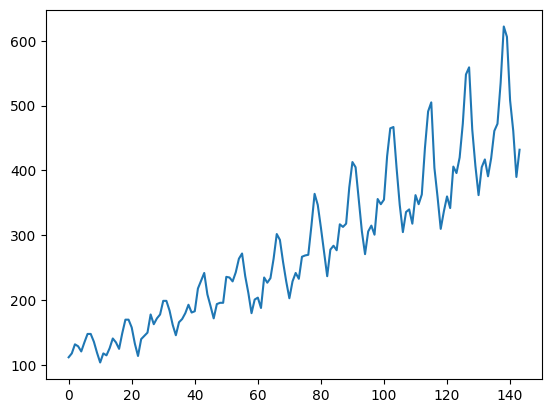

In [26]:
df = pd.read_csv('/content/airline_passenger.csv',usecols=[1],engine='python')
ds = df.values
ds = ds.astype('float32')
plt.plot(df)
plt.show()

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
ds = scaler.fit_transform(ds)

In [30]:
train_size = int(len(ds)*0.69)
test_size = len(ds) - train_size
train,test = ds[0:train_size,:],ds[train_size:len(ds),:]
print(len(train),len(test))

99 45


In [33]:
def create_ds(ds,look_back=1):
  dX,dY = [], []
  for i in range(len(ds)-look_back-1):
    a = ds[i:(i+look_back),0]
    dX.append(a)
    dY.append(ds[i+look_back,0])

  return np.array(dX),np.array(dY)

In [35]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_ds(train, look_back)
testX, testY = create_ds(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [39]:
model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(3))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy','mse','mae'])
model.fit(trainX,trainY,epochs=100,batch_size=5,verbose=2)

Epoch 1/100
20/20 - 3s - loss: 0.0493 - accuracy: 0.0000e+00 - mse: 0.0493 - mae: 0.1831 - 3s/epoch - 156ms/step
Epoch 2/100
20/20 - 0s - loss: 0.0401 - accuracy: 0.0000e+00 - mse: 0.0401 - mae: 0.1584 - 50ms/epoch - 3ms/step
Epoch 3/100
20/20 - 0s - loss: 0.0322 - accuracy: 0.0000e+00 - mse: 0.0322 - mae: 0.1379 - 51ms/epoch - 3ms/step
Epoch 4/100
20/20 - 0s - loss: 0.0263 - accuracy: 0.0000e+00 - mse: 0.0263 - mae: 0.1232 - 51ms/epoch - 3ms/step
Epoch 5/100
20/20 - 0s - loss: 0.0220 - accuracy: 0.0000e+00 - mse: 0.0220 - mae: 0.1116 - 52ms/epoch - 3ms/step
Epoch 6/100
20/20 - 0s - loss: 0.0189 - accuracy: 0.0000e+00 - mse: 0.0189 - mae: 0.1050 - 52ms/epoch - 3ms/step
Epoch 7/100
20/20 - 0s - loss: 0.0166 - accuracy: 0.0000e+00 - mse: 0.0166 - mae: 0.0991 - 53ms/epoch - 3ms/step
Epoch 8/100
20/20 - 0s - loss: 0.0150 - accuracy: 0.0000e+00 - mse: 0.0150 - mae: 0.0958 - 51ms/epoch - 3ms/step
Epoch 9/100
20/20 - 0s - loss: 0.0139 - accuracy: 0.0000e+00 - mse: 0.0139 - mae: 0.0938 - 58ms/

In [40]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 4ms/step
Train Score: 0.04 RMSE
Test Score: 0.10 RMSE


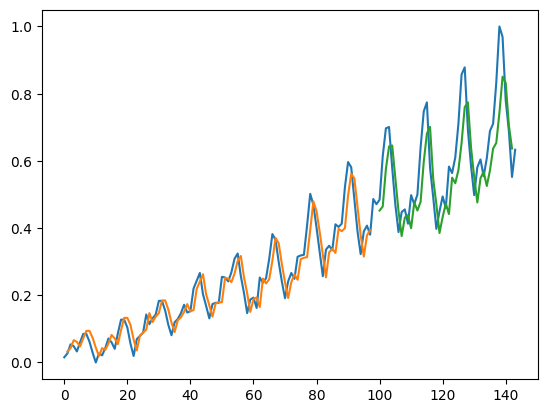

In [45]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(ds)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, 0] = trainPredict[:, 0]
# shift test predictions for plotting
testPredictPlot = np.empty_like(ds)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(ds)-1, 0] = testPredict[:, 0]
# plot baseline and predictions
plt.plot(scaler.inverse_transform(ds))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
print(trainPredict.shape)
print(trainPredictPlot.shape
      )

(97, 3)
(144, 1)
